### Exercise sheet 3
## Numerical part

### Group number:  (3)

This tutorial  covers the basics of using qutip to simulate quantum systems:
http://qutip.org/tutorials.html

For most of the operations needed in this exercise sheet there are predefined functions available in qutip.

In [99]:
from qutip import *

In [100]:
import numpy as np
import matplotlib.pyplot as plt


In the following problems you will be asked to define some quantum states in the Fock basis. For this you will have to select a cutoff $n_\mathrm{max}$ in the dimension of this space. Make sure you select a cutoff for which the populations in states left out are negligible. These exercises will allow you to numerically explore key properties and time evolution of quantum states that have been introduced in the lecture and previous exercise sheets.

Remember that you can add new cells to the jupyter notebook (shortcut "B") and set them as Markdown (shortcut "M") to add comments and explanations to your solutions. You can write in $\LaTeX$ format on these cells.

Add as many cells as you need in order to present your solution.

# Dimension of the space 
We need to set a cut-off value for the dimensionality of Hilbert space, such that relevant states are not left out. 
We encouter $|\alpha = 5>$ as effectively the "highest state".  
$$|\alpha> = \exp\big({-\frac{|\alpha|^2}{2}}\big)\sum \frac{\alpha^n}{\sqrt{n!}}|n>$$
Terms corresponding to very large $n$ (where $\frac{1}{\sqrt{n!}}$ dominates $\alpha^n$) can be safely ignored.
For $\alpha = 5$, it turns out that $n_{max} = 100$ is a safe cutoff value. 

In [120]:
N = 100 #n_max (global)

# Exercise 2
## Defining states
### a) Define the state $|\psi\rangle = ( |0\rangle + |8\rangle)/\sqrt{2}$ and plot the populations

 Ground and 8th excited state have 50-50 chance of being occupied. 
 Note that the left bar corresponding to the ground state is barely visible as a line. 

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a17d48c50>)

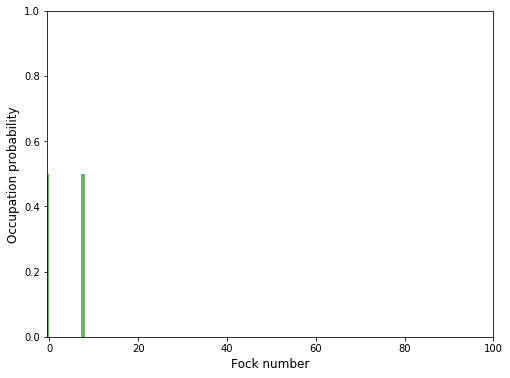

In [121]:
psi1 = (2**-.5)*(fock(N,0) + fock(N,8)) # normalized linear combination of ground and 8th excited state
plot_fock_distribution(psi1) #population plot

### b) Define the superposition of Fock states $\frac{1}{\sqrt{3}}(|0\rangle+|1\rangle+|2\rangle)$. Assuming the Hamiltonian $H=a^\dagger a +1/2$, plot the time evolution of the expectation value of the quadratures $\hat{P}(t)$ and $\hat{Q}(t)$ in phase space for the time interval $t=[0, 2\pi]$. Compare it with the evolution of the coherent state $|\alpha=1\rangle$ in phase space.

The states have very similar time evolution.

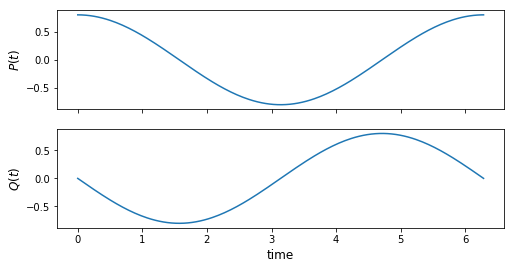

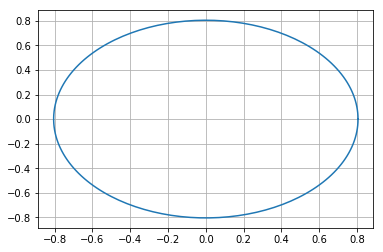

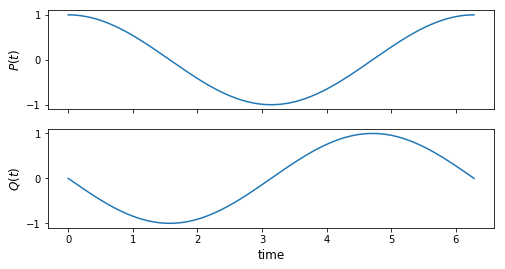

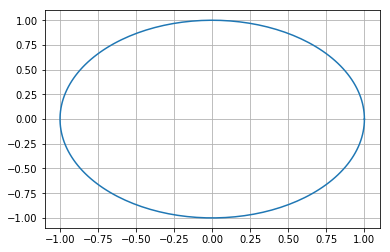

In [122]:
psi2 = (3**-.5)*(fock(N,0) + fock(N,1) + fock(N,2))
Q = (destroy(N) + create(N))/2.0
P = (destroy(N) - create(N))/(2*1j)

e_ops = [Q,P]
times2 = np.linspace(0, 2*np.pi, 200)
H = create(N)*destroy(N) + 0.5  # setting hw = 1
result2 = mesolve(H, psi2, times2, [], e_ops)
plot_expectation_values(result2, ylabels = [r'$P(t)$',r'$Q(t)$']); #Q-t nd P-t plot
plt.figure()
plt.plot(result2.expect[0],result2.expect[1]) # Q-P phase space plot
plt.grid()
plt.show()


#coherent state alpha = 1
psi3 = coherent(N,1)
result3 = mesolve(H, psi3, times2, [], e_ops)
plot_expectation_values(result3,ylabels = [r'$P(t)$',r'$Q(t)$']); #Q-t nd P-t plot
plt.figure()
plt.plot(result3.expect[0],result3.expect[1]) # Q-P phase space plot
plt.grid()
plt.show()


#very similar plots compare in text

### c) Define the superposition $|\psi_1\rangle\propto |\alpha\rangle + |-\alpha\rangle$ for $\alpha = 3$, normalise it and plot the populations in the Fock basis. Do the same for $|\psi_2\rangle\propto |\alpha\rangle - |-\alpha\rangle$ for $\alpha=3$. What do you observe for the corresponding distributions? Can you give an analytical explanation for your observation?


$$|\psi\rangle_{\pm} = |3\rangle \pm |-3\rangle$$
$$|\psi\rangle_{\pm} = e^{\frac{-4.5}{2}}\sum_{m} \frac{(3)^m(1 \pm (-1)^m)}{\sqrt{m!}}|m\rangle$$
$$\langle n |\psi\rangle_{\pm} = e^{\frac{-4.5}{2}}\sum_{m} \frac{(3)^m(1 \pm (-1)^m)}{\sqrt{m!}}\langle n|m\rangle$$
$$\langle n |\psi\rangle_{\pm} = e^{\frac{-4.5}{2}}\frac{(3)^n(1 \pm (-1)^n)}{\sqrt{n!}}$$
Alternate fock states are unoccupied!

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1a0f79d0>)

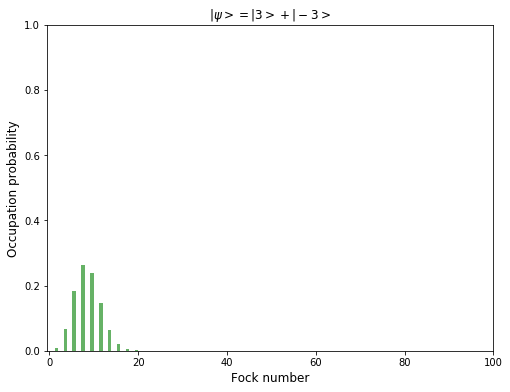

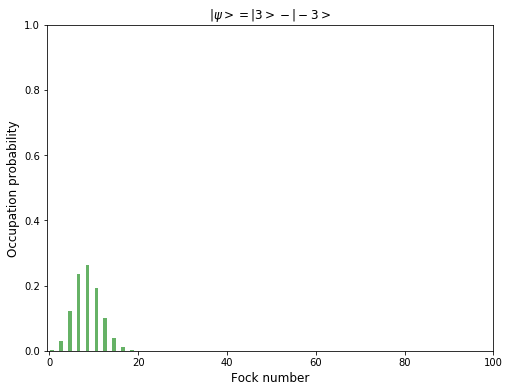

In [123]:
psi4 = (coherent(N,3) + coherent(N,-3)).unit() #normalised superposition
plot_fock_distribution(psi4,title = r'$|\psi> = |3> + |-3>$')
psi5 = (coherent(N,3) - coherent(N,-3)).unit() #normalised superposition
plot_fock_distribution(psi5, title = r'$|\psi> = |3> - |-3>$')


### d) Define a thermal state with an expected number of $\langle n\rangle=10$ and plot the populations. Assuming the previous Hamiltonian, will this state evolve in time? Plot the standard deviation of $\hat{P}$ and $\hat{Q}$ in phase space for thermal states with $\langle n\rangle=10$ and $\langle n\rangle=20$.

Thermal fields are in equilibrium and therefore the density matrix does not evolve in time. 

Text(0,0.5,'P')

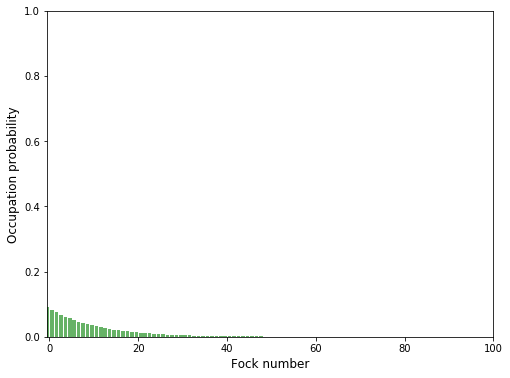

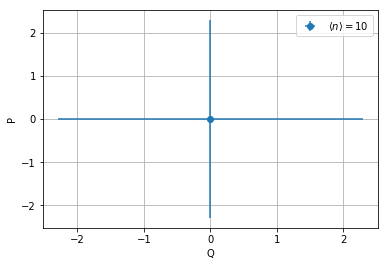

<Figure size 432x288 with 0 Axes>

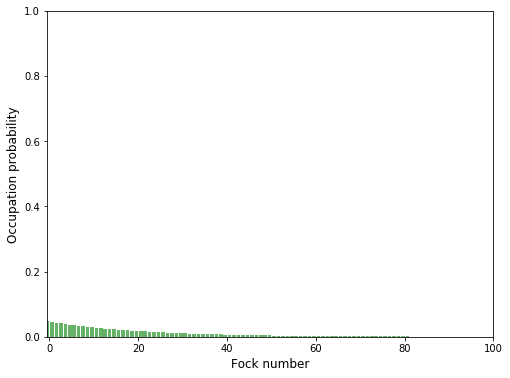

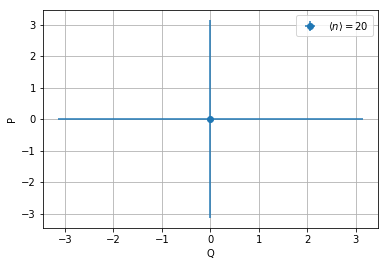

In [156]:
psi6 = thermal_dm(N,10)
plot_fock_distribution(psi6)
plt.figure()
std_Q_10 = np.sqrt(expect(Q*Q,psi6) - expect(Q,psi6)**2)
std_P_10 = np.sqrt(expect(P*P,psi6) - expect(P,psi6)**2)
Q_10 = expect(Q,psi6)
P_10 = expect(P,psi6)
plt.errorbar([Q_10],[P_10],xerr = [std_Q_10], yerr = [std_P_10], fmt = 'o', label = r'$\langle n \rangle = 10$')
plt.legend()
plt.grid()
plt.xlabel('Q')
plt.ylabel('P')
plt.figure()

psi7 = thermal_dm(N,20)
plot_fock_distribution(psi7)
plt.figure()
std_Q_20 = np.sqrt(expect(Q*Q,psi7) - expect(Q,psi7)**2)
std_P_20 = np.sqrt(expect(P*P,psi7) - expect(P,psi7)**2)
Q_20 = expect(Q,psi7)
P_20 = expect(P,psi7)

plt.errorbar([Q_20],[P_20],xerr = [std_Q_20], yerr = [std_P_20], fmt = 'o', label = r'$\langle n \rangle = 20$')
plt.legend()
plt.grid()
plt.xlabel('Q')
plt.ylabel('P')



# Exercise 3

### a) Define a coherent state $|\alpha = 5\rangle$ and plot the populations in the Fock basis. Which one is the Fock state with the largest population?

The population peak lies at $n = 24 \text{ or } 25$. (difficult to calculate difference for the two states using default floating point precision)

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1a725150>)

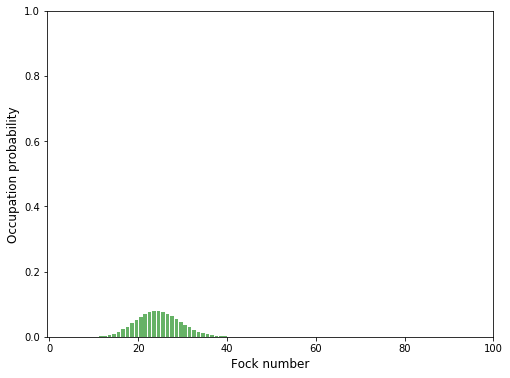

In [124]:
psi9 = coherent(N,5)
plot_fock_distribution(psi9)


### b) Compute the expected value of $\hat{P}$ and $\hat{Q}$ for the previous state and plot the "coordinate" ($\langle \hat{Q}\rangle, \langle \hat{P}\rangle$) of the state in phase space. Compute the variances of both operators and then add the standard deviations to the plot.

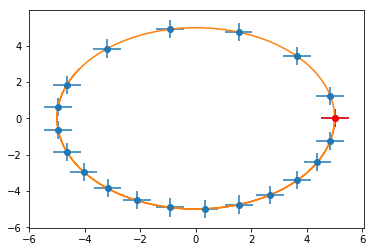

In [125]:
e_ops = [Q,P,Q*Q,P*P]
times9 = np.linspace(0, 10, 200)
result9 = mesolve(H, psi9, times9, [], e_ops)
std_Q = np.sqrt(result9.expect[2] - result9.expect[0]**2)
std_P = np.sqrt(result9.expect[3] - result9.expect[1]**2)



plt.figure()
#prettier plot
plt.errorbar(result9.expect[0][0:200:10],result9.expect[1][0:200:10],xerr = std_Q[0:200:10], yerr = std_P[0:200:10], fmt = 'o')
plt.errorbar(result9.expect[0][0],result9.expect[1][0],xerr = std_Q[0], yerr = std_P[0], fmt = 'ro') #initial coordinates shown in red
plt.plot(result9.expect[0],result9.expect[1])



### c) Using the Hamiltonian $H = \hat{a}^\dagger \hat{a} + \tfrac{1}{2}$ (where we have set $\hbar \omega \equiv1$), plot the evolution of the state for the time $t=0$ to $t=5$ in phase space. After which time does the state evolve back to the initial state? 

the cycle repeats after about 6.3 seconds

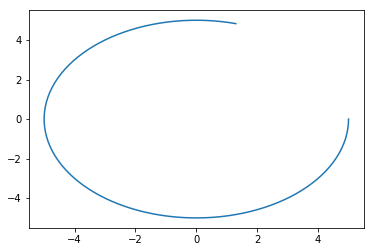

In [126]:
plt.plot(result9.expect[0][times9 < 5],result9.expect[1][times9 < 5])


### d) Plot the standard deviation of $\hat{P}(t)$ and $\hat{Q}(t)$ as a function of time $t$ for the previous time interval, $t=[0,5]$.

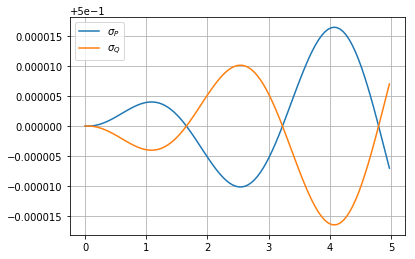

In [127]:
plt.plot(times9[times9 < 5],std_P[times9 < 5],label =  r'$\sigma_P$')
plt.plot(times9[times9 < 5],std_Q[times9 < 5], label = r'$\sigma_Q$')
plt.legend()
plt.grid()


### e) Evolve the state for a short time $t = \pi/100$. What is the overlap between the state at time $t = \pi/100$ and the initial state at $t=0$? Plot the overlap between the state at time $t$ and the intial state as a function of time, for $t \in [0,2\pi]$.

 (text)

overalp of intial state and evovled state at t = pi/100 (1+0j)


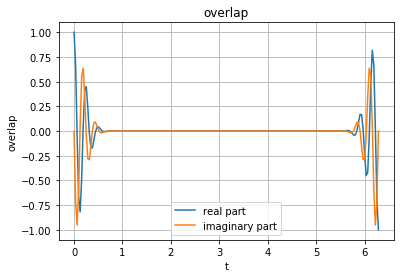

In [133]:
times9 = np.linspace(0,2*np.pi,200)
result_overlap = mesolve(H, psi9, times9, [],[]) #returns list of evolved state vectors (need to solve again for states becuase last time we just solved for expectation values) 
result_short = mesolve(H, psi9, [np.pi/100.0], [],[]) #single evolved state at t = pi/100

print 'overalp of intial state and evovled state at t = pi/100', psi9.overlap(result_short.states[0]) 
plot_data = []
for state in result_overlap.states[:]:
    plot_data.append(psi9.overlap(state))

plt.plot(times9,np.real(plot_data), label = 'real part')
plt.plot(times9,np.imag(plot_data), label = 'imaginary part')

plt.legend()
plt.title('overlap')
plt.xlabel('t')
plt.ylabel('overlap')
plt.grid()
plt.show()
